We reproduce Section 5.2 Figure 12 in this notebook, which makes use of the native instruction of IBM to simulate $H=Z_1X_2+X_2Z_3$. 

This case study is designed specifically to demonstrate the schedule duration saving of exploiting native instructions of IBM. We generate the pulse schedule in this notebook. You need an IBM account to run the code. You will be given a API token from the IBM account. You may not have access to the `ibmq_mumbai` device. As the time when this document is written, you may access `ibmq_lagos` through the open plan of IBM. 

In [1]:
import numpy as np
import warnings 
warnings.filterwarnings('ignore', category=DeprecationWarning)

from simuq.backends.qiskit_zxi_ixz import build_zxi_ixz
from qiskit import schedule, IBMQ

In [2]:
with open("../../../qiskit_APIKEY", "r") as f:
    API_key = f.readline().strip()
provider = IBMQ.enable_account(API_key, hub="ibm-q-ornl", group="ornl", project="phy147")
backend = provider.get_backend("ibmq_mumbai")

If the above account setting does not work for you, you may also try the below one.

In [3]:
#provider = IBMQ.enable_account("YOUR_API_TOKEN", hub="ibm-q", group="open", project="main")
#backend = provider.get_backend("ibm_lagos")

976


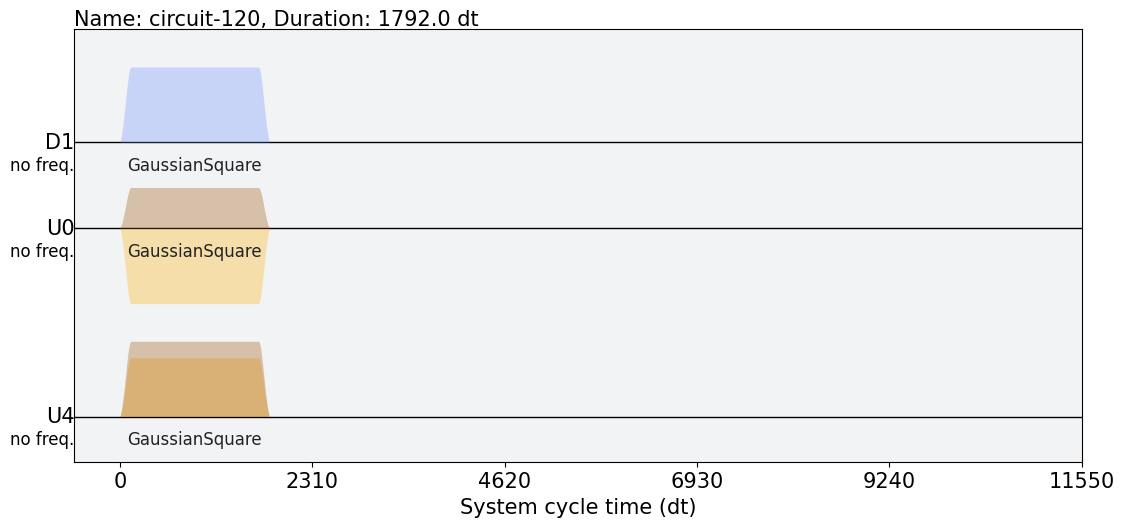

In [4]:
circ=build_zxi_ixz(backend, with_measure=False)
sched=schedule(circ, backend)
sched.draw(time_range=[0,11000])